<a href="https://colab.research.google.com/github/NoviceCoder2/AI-solution-for-small-cafe/blob/main/Text-to-Speech%20Using%20Google%20Text-to-Speech%20(gTTS)%20for%20Natural%20Sounding%20Speech%20with%20Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gtts librosa soundfile pydub


In [2]:
!pip install gtts


In [3]:
from gtts import gTTS
import os

text = "Hello, how are you feeling today?"
tts = gTTS(text, lang='en')
tts.save("neutral_voice.mp3")

os.system("mpg321 neutral_voice.mp3")


32512

In [4]:
tts = gTTS(text, lang='en', slow=False)
tts.save("happy_voice.mp3")


In [5]:
tts = gTTS(text, lang='en', slow=True)
tts.save("sad_voice.mp3")


In [6]:
from gtts import gTTS
import os
import librosa
import soundfile as sf
from pydub import AudioSegment
def generate_speech(text, filename, lang='en', slow=False):
    tts = gTTS(text=text, lang=lang, slow=slow)
    tts.save(f"{filename}.mp3")
    print(f"Generated {filename}.mp3")

def play_audio(file_path):
    audio = AudioSegment.from_mp3(file_path)
    audio.export("temp.wav", format="wav")
    os.system("start temp.wav")

neutral_text = "Hello, how are you feeling today?"
happy_text = "I am so happy to see you!"
sad_text = "I am really sorry to hear that."


generate_speech(neutral_text, "neutral_voice")

generate_speech(happy_text, "happy_voice", slow=False)

generate_speech(sad_text, "sad_voice", slow=True)

play_audio("neutral_voice.mp3")
play_audio("happy_voice.mp3")
play_audio("sad_voice.mp3")


Generated neutral_voice.mp3
Generated happy_voice.mp3
Generated sad_voice.mp3


In [8]:
import os
from gtts import gTTS

if not os.path.exists("audio"):
    os.makedirs("audio")

def generate_gtts(text, filename, lang='en', slow=False):
    tts = gTTS(text=text, lang=lang, slow=slow)
    tts.save(filename)
    print(f"Generated {filename}")

generate_gtts("I am so happy today!", "audio/happy_voice.mp3")

generate_gtts("I feel very sad today.", "audio/sad_voice.mp3")


Generated audio/happy_voice.mp3
Generated audio/sad_voice.mp3


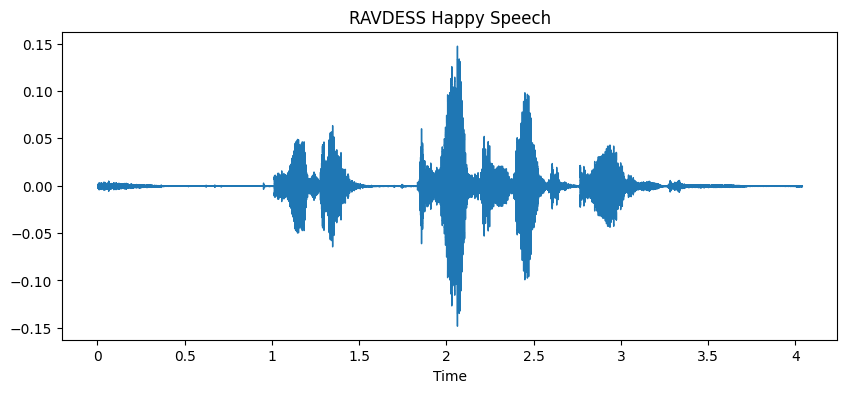

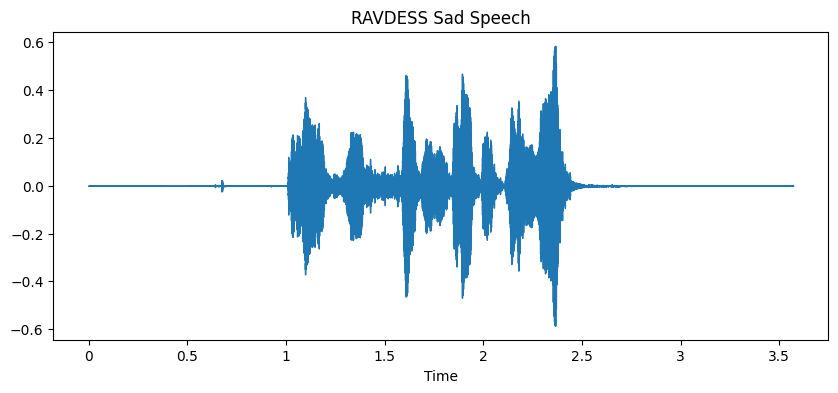

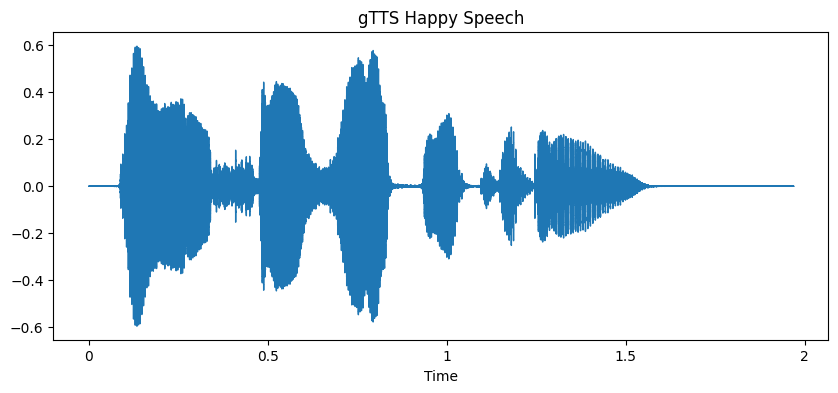

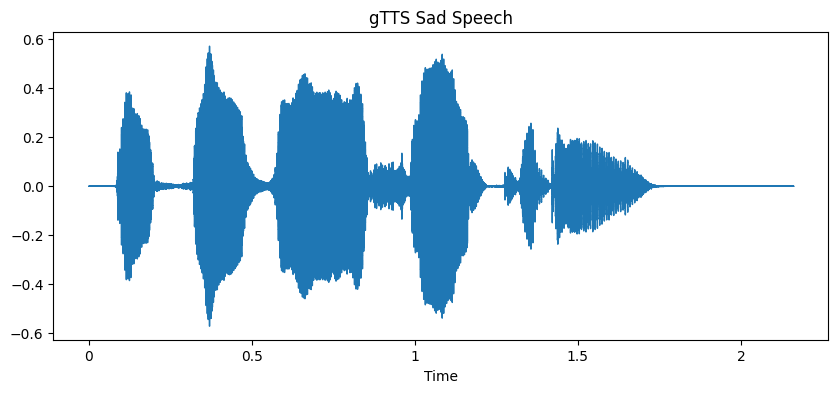

In [14]:
import librosa.display
import matplotlib.pyplot as plt

def plot_waveform(audio_file, title):
    try:

        data, sample_rate = librosa.load(audio_file)
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(data, sr=sample_rate)
        plt.title(title)
        plt.show()
    except FileNotFoundError:
        print(f"File not found: {audio_file}")
    except Exception as e:
        print(f"Error loading {audio_file}: {e}")


ravdess_happy_audio = '/content/03-01-07-01-01-01-03.wav'
ravdess_sad_audio = '/content/03-01-06-02-02-02-04.wav'
plot_waveform(ravdess_happy_audio, "RAVDESS Happy Speech")
plot_waveform(ravdess_sad_audio, "RAVDESS Sad Speech")
plot_waveform("audio/happy_voice.mp3", "gTTS Happy Speech")
plot_waveform("audio/sad_voice.mp3", "gTTS Sad Speech")


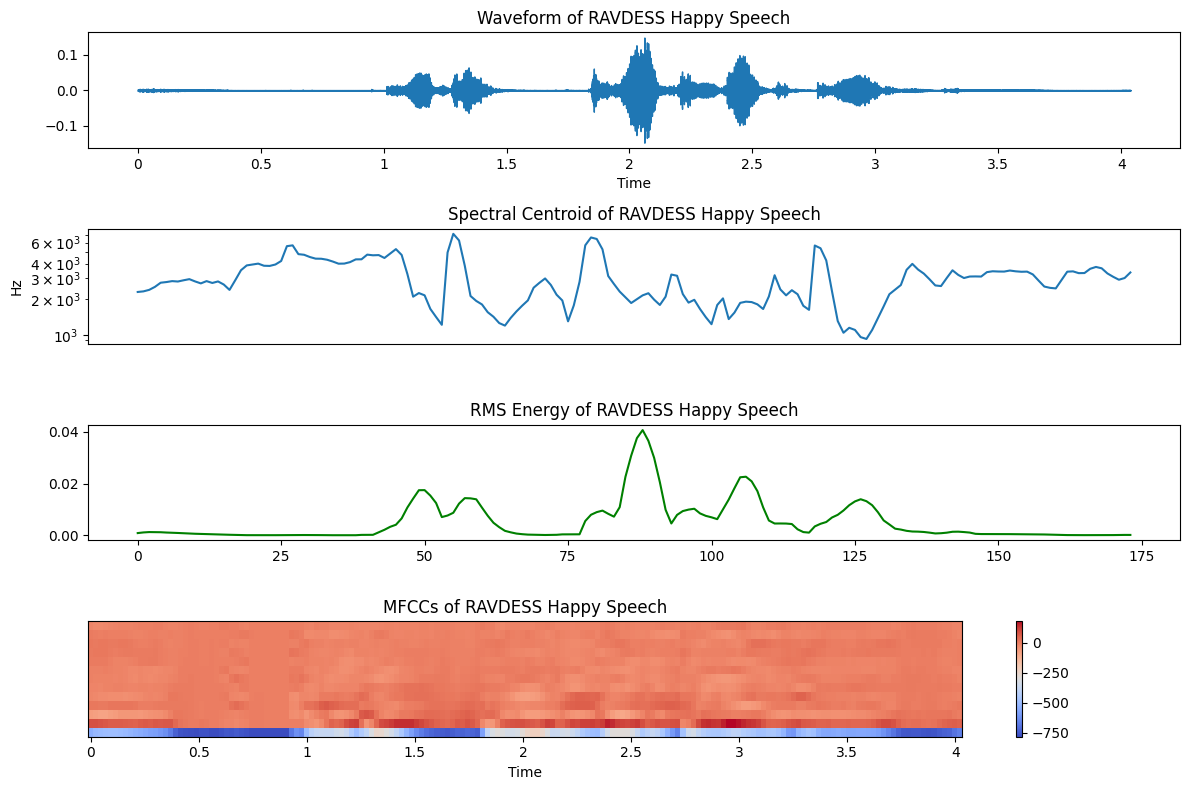

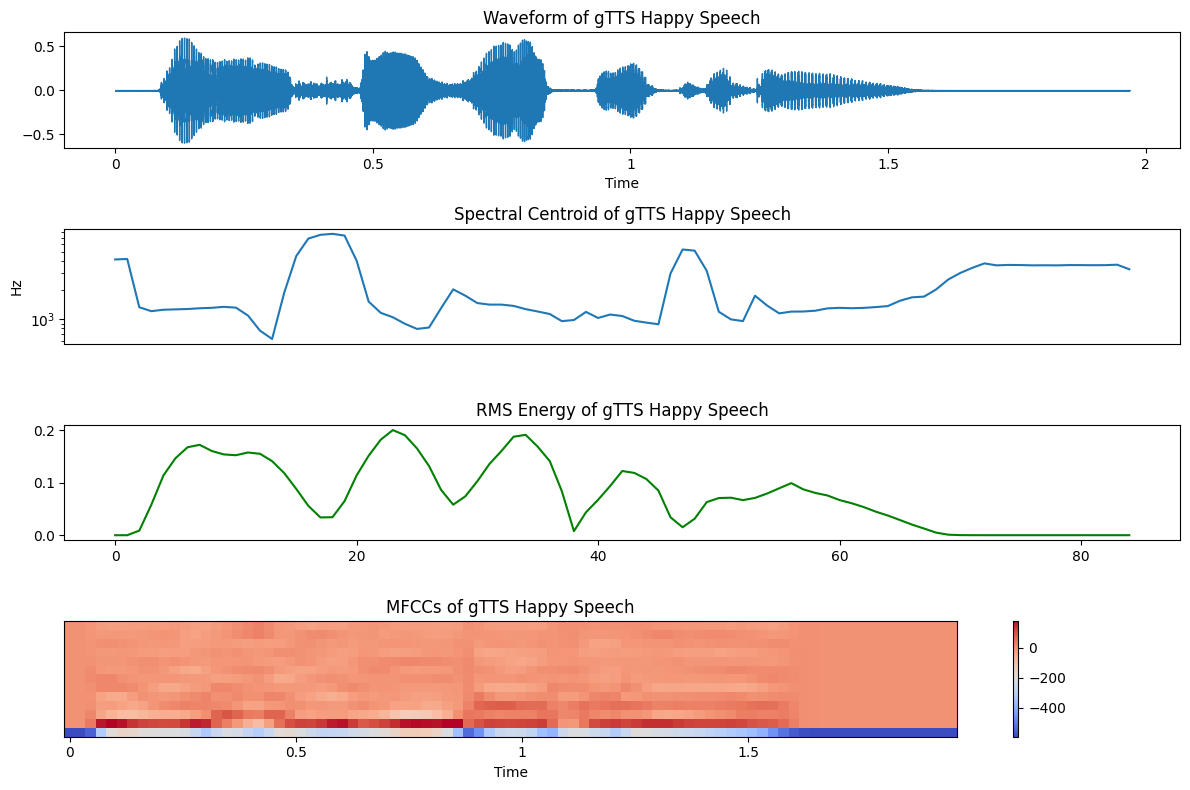

In [15]:
import librosa
import librosa.display
import numpy as np

def analyze_audio_features(audio_file, title):
    data, sample_rate = librosa.load(audio_file)
    spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sample_rate)[0]
    zero_crossings = librosa.zero_crossings(data, pad=False)
    rms_energy = librosa.feature.rms(y=data)[0]
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13)
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.title(f"Waveform of {title}")
    plt.subplot(4, 1, 2)
    plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.title(f"Spectral Centroid of {title}")
    plt.subplot(4, 1, 3)
    plt.plot(rms_energy, label='RMS Energy', color='g')
    plt.title(f"RMS Energy of {title}")
    plt.subplot(4, 1, 4)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCCs of {title}")

    plt.tight_layout()
    plt.show()

analyze_audio_features(ravdess_happy_audio, "RAVDESS Happy Speech")
analyze_audio_features("audio/happy_voice.mp3", "gTTS Happy Speech")


In [16]:
from IPython.display import display, Audio

# Display all audio files
display(Audio("audio/happy_voice.mp3"))  # gTTS Happy Voice
display(Audio("audio/sad_voice.mp3"))    # gTTS Sad Voice
display(Audio(ravdess_happy_audio))       # RAVDESS Happy Voice
display(Audio(ravdess_sad_audio))         # RAVDESS Sad Voice
